<a href="https://colab.research.google.com/github/Kavyasree-351/trials.music/blob/main/Raga_Generator_and_Sarali_Player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎶 Raga Generator & Sarali Player

## Table of Contents

1.Install Dependencies

2.Imports & Global Settings

3.Swara & Raga Definitions

4.Random Raga Generator (Mayamalavagowla)

5.Tala Visualizer

6.MIDI Generator

7.Sarali Varisai Pattern Engine

8.Run Demo

## 1. Install Dependencies

In [14]:
!pip install mido

## 2. Imports & Global Settings

In [23]:
import random
import numpy as np
import mido
import matplotlib.pyplot as plt
from mido import MidiFile, MidiTrack, Message
from IPython.display import Audio, display, clear_output
from google.colab import files

3. Collect All Constants in One Block

Put all these together:

✔ Sa frequency
✔ MIDI mapping
✔ swara ratios
✔ raga list

## 3. Swara & Raga Definitions

In [16]:
SA_FREQ = 207.65

NOTE_RATIOS = {
    "S": 1,
    "R1": 16/15,
    "G3": 5/4,
    "M1": 4/3,
    "P": 3/2,
    "D1": 5/3,
    "N3": 15/8,
    "S'": 2
}

MAYAMALAVAGOWLA = ["S", "R1", "G3", "M1", "P", "D1", "N3", "S'"]

SHRUTI_SA_MIDI = 56


4. Put All Helper Functions in One Section


## 4. Utility Functions

In [17]:
def swara_to_freq(swara):
    return SA_FREQ * NOTE_RATIOS.get(swara, 1)

def get_midi_mapping(sa):
    return {
        "S": sa,
        "R1": sa + 1,
        "G3": sa + 3,
        "M1": sa + 5,
        "P": sa + 7,
        "D1": sa + 9,
        "N3": sa + 11,
        "S'": sa + 12
    }


## 5. MIDI Generator

In [18]:
def generate_midi(swaras, mapping, filename="raga.mid"):
    midi = MidiFile()
    track = MidiTrack()
    midi.tracks.append(track)

    track.append(Message('program_change', program=12))

    for s in swaras:
        note = mapping[s]
        track.append(Message('note_on', note=note, velocity=64, time=500))
        track.append(Message('note_off', note=note, velocity=64, time=500))

    midi.save(filename)
    files.download(filename)


##6. Random Raga Generator

In [19]:
def generate_avartana():
    return random.choices(MAYAMALAVAGOWLA, k=8)



## 7. Tala Visualizer

In [20]:
def show_tala_with_swaras(swaras):
    beats = list(range(1, len(swaras)+1))

    plt.figure(figsize=(12, 1.5))
    plt.xticks(beats, beats)
    plt.yticks([])
    plt.title("Adi Tala")

    for i, s in enumerate(swaras):
        plt.text(i+1, 0, s, ha="center", va="center", fontsize=14)

    plt.axhline(0, color='black')
    plt.show()


## 8. Sarali Pattern Engine

In [21]:
SARALI_PATTERNS = [
    ["S","R1","G3","M1","G3","M1","P","D1"],
    ["S","S","R1","R1","G3","G3","M1","M1"],
    ["S","R1","S","R1","G3","R1","G3","M1"]
]

def sarali_avartana():
    return random.choice(SARALI_PATTERNS)


Avartana 1: ['S', "S'", 'G3', 'G3', 'P', 'N3', 'S', 'P']
Avartana 2: ['D1', 'S', "S'", "S'", 'M1', 'D1', 'R1', 'G3']


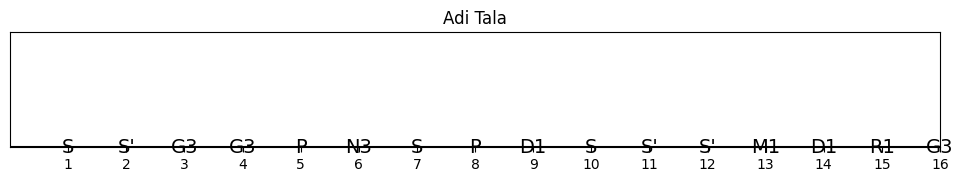

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
mapping = get_midi_mapping(SHRUTI_SA_MIDI)

av1 = generate_avartana()
av2 = generate_avartana()

total = av1 + av2

print("Avartana 1:", av1)
print("Avartana 2:", av2)

show_tala_with_swaras(total)
generate_midi(total, mapping)